<a href="https://colab.research.google.com/github/rohansh4510/Stock-Prediction-using-LSTM/blob/main/Stock_Prediction_using(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install quandl
import quandl

In [ ]:
df=web.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2019-12-17')
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-17,68.4731,69.0125,68.2837,68.6765,1.166743e+08
2019-12-16,67.8401,68.7722,67.8361,68.5449,1.309864e+08
2019-12-13,66.4862,67.4273,66.3556,67.3914,1.365054e+08
2019-12-12,65.5859,66.7544,65.4723,66.4862,1.406056e+08
2019-12-11,65.8372,66.3975,65.7604,66.3177,8.053014e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [ ]:
df.shape

(2003, 5)

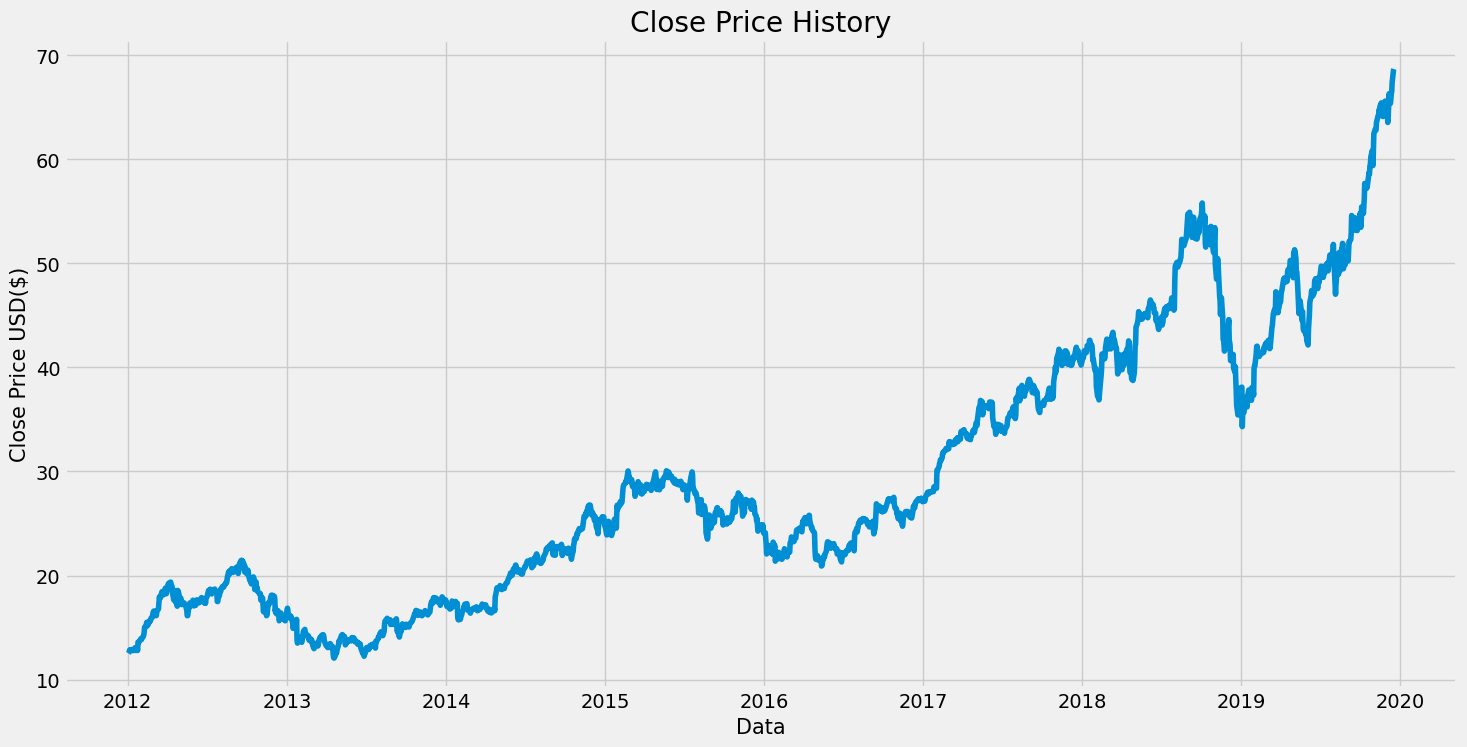

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=15)
plt.ylabel('Close Price USD($)',fontsize=15)
plt.show()

In [ ]:
data=df.filter(['Close'])
#convert data frames to numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1603

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.99767542],
       [0.97729999],
       ...,
       [0.01171124],
       [0.00922768],
       [0.00804772]])

In [ ]:
#create training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len]
#split data into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()

[array([1.        , 0.99767542, 0.97729999, 0.96131053, 0.95833414,
       0.94840167, 0.94163989, 0.95806918, 0.9358461 , 0.91927549,
       0.90937835, 0.92971845, 0.9431007 , 0.94565492, 0.93028017,
       0.93926232, 0.91939737, 0.92038479, 0.92556211, 0.93892847,
       0.94245067, 0.93658445, 0.92316687, 0.93107328, 0.92017282,
       0.9212309 , 0.91230174, 0.90929003, 0.89643417, 0.89593957,
       0.89756113, 0.89030652, 0.85987497, 0.83617341, 0.83631119,
       0.86110792, 0.85048832, 0.83757947, 0.83582013, 0.82194329,
       0.82423254, 0.80660387, 0.80172683, 0.79785312, 0.80190171,
       0.80424572, 0.80572243, 0.77936067, 0.7661003 , 0.754813  ,
       0.76622395, 0.76599608, 0.73943825, 0.73130221, 0.75563968,
       0.75292825, 0.73074049, 0.7353349 , 0.74033735, 0.72587759])]
[0.7302812286375929]

[array([1.        , 0.99767542, 0.97729999, 0.96131053, 0.95833414,
       0.94840167, 0.94163989, 0.95806918, 0.9358461 , 0.91927549,
       0.90937835, 0.92971845, 0.943

In [ ]:
#conver x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train);

In [ ]:
#reshape the data into 3d because LSTM model needs 3d data and we have 2d data now
x_train.shape

(1543, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
#build the LSTM model 50 and 25 and 1 are number of neurons
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 48s 29ms/step - loss: 0.0011


In [ ]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data to numpy array
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 23ms/step


In [ ]:
#get the rms error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.689808302936554

<ipython-input-30-23c61849031b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


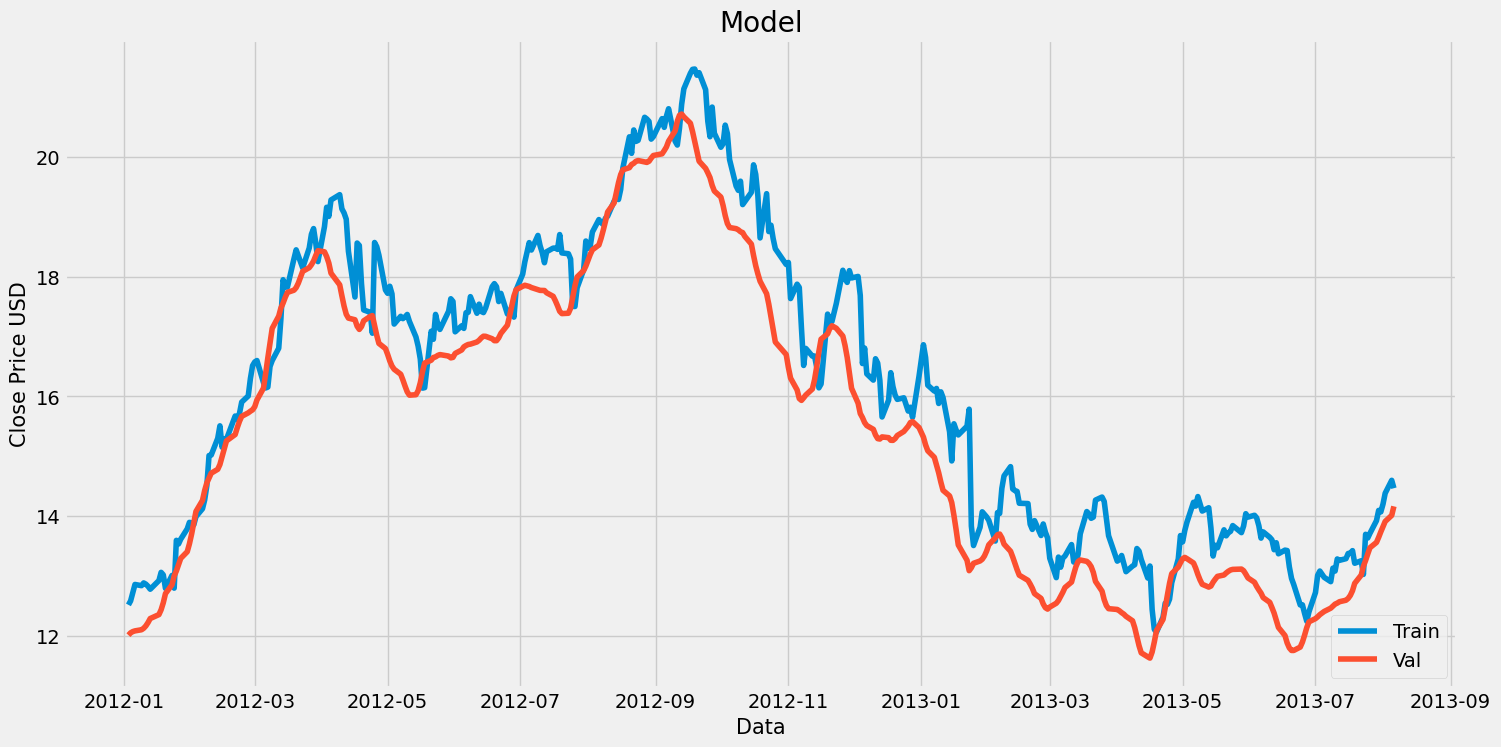

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=15)
plt.ylabel('Close Price USD',fontsize=15)
plt.plot()
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted

,Close,Predictions
Date,,
2013-08-06,14.4679,14.165180
2013-08-05,14.5995,14.014226
2013-08-02,14.3841,13.913061
2013-08-01,14.2026,13.827460
2013-07-31,14.0721,13.739962
...,...,...
2012-01-09,12.8408,12.104681
2012-01-06,12.8608,12.085802
2012-01-05,12.7272,12.073995


In [ ]:
#get the quote
apple_quote=web.DataReader('AAPL',data_source-'stooq',start='2012-01-01',end='2019-12-17')
#create new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price and convert
last_60=new_df[-60:].values
last_60_scaled=scaler.transform(last_60)
x_test=[]
#Append the past 60days
X_test.append(last_60_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)




NameError: name 'data_source' is not defined